In [ ]:
import matplotlib.pyplot as plt
bigfontsize=20
labelfontsize=16
tickfontsize=16
plt.rcParams.update({'font.size': bigfontsize,
                     'axes.labelsize':labelfontsize,
                     'xtick.labelsize':tickfontsize,
                     'ytick.labelsize':tickfontsize,
                     'legend.fontsize':tickfontsize,
                     })


# Задача вывода

Чтобы найти значение незвестной величины необходимо провести эксперимент. Будь то вероятность распада элементарной частицы, среднее число посетителей сайта, или точность работы промышленного робота - мы проводим эксперименты. Измеряемые значения, как правило, являются случайными величинами с распределением зависящим от искомой величины. Так, число посетителей сайта связано с его популярностью, но все же является флуктуацией вокруг какого-то среднего. Проанализировав распады тысячи частиц мы сможем посчитать среднюю вероятность распада в единицу времени, но результат будет розниться от эксперимента к экперименту.

Задача оценки параметра модели по результатам эксперимента называется задачей вывода (inference). В классической статистике считется что существует некоторое истиное значение параметра и мы пытаемся предсказать в каких пределах будут меняться значения этого параметра измереные в  будущих экспериментах. Например - мы считаем что есть некоторая истинная вероятность распада элменетарной частицы, и мы, по результатам нашего эксперимента, пытаемся оценить какие значения могут получать будущие исследователи.

В байесовской интерпретации мы пытаемся составить оценку которая бы наилучшим образом уживалась с получеными измерениями и нашими априорными представлениями. В прошлой лекции мы уже вводили понятие байесовского вывода - трансформации априорных распределений с учетом экспериментальных данных. В ходе лекции мы будем придерживаться байесовской трактовки задачи вывода.

В статистике процесс оценки параметров модели из данных называется фитированием (fitting). В машинном обучении этот же процесс чаще называется тренировкой (training). Процесс фитирования обычно сводится к нахождению значений параметров минимизурющих функцию потерь  (loss function, objective):

$$\bar{\theta} = \underset{\theta}{\operatorname{argmin}}\mathcal{F}(\theta)$$

Такое решение может быть численным или аналитическим, точным или приближенным.

# Точечная оценка (point estimate)

Оценка параметра модели - это случайная величина с каким-то распределением. Иногда (когда мы верим что это распределение очень узкое и дисперсия параметра пренебрежимо мала) мы можем ограничиться точечной оценкой параметра (point estimate) - одним значением которое наилучшим образом описывает наше представление о параметре. 

Представьте что мы отвечаем за обслуживание комплекса зданий с 10000 лампочек. Часть лампочек (7000 штук) произведена фирмой "Светлячок", а другая (3000 штуки) - фирмой "Люстра". В ходе первого месяца использования из 7000 тысяч Светлячков 7 вышло из строя (0.1%), и за то же время из 3000 Люстр перегорело 300 (10%). В такой ситуации мы можем перестать заказывать "Люстры" и пренебречь ошибкой оценки вероятности выходы лампочки из строя. В то же время, если бы у нас перегорели всего 4 "Люстры", то оценки вероятности выхода лампы из строя были бы очень близки,и нам бы уже пришлось внимательно анализировать дисперсию оценки.

## Метод моментов

Одним из самых простых способов для быстрой точечной оценки является метод моментов. Моментом порядка $k$ случайной величины $X$ является статистика вида

$$E(X^k)$$

С некоторым моментами мы уже знакомы - моментом первого порядка  $E(X)$ является среднее, а центральным момнетом второго порядка $E([\bar{X}-X]^2)$- дисперсия.

В случае заданого распределения, его моменты зависят от параметров. Соответсвенно, параметры распределения можно выразить через его моменты.  Вспомним, например, равномерное распределние. Оно имеет два параметра - $a$ и $b$ (вернхнюю и нижнюю границу). Среднее и дисперсия выражаются через эти параметры как

$$\mu = \frac{a+b}{2}$$
$$\sigma^2 = \frac{(b-a)^2}{12}$$

Если решить эту систему уравниений относительно параметров $a$ и $b$, получим:

$$b = \frac{2\mu + \sqrt{12\sigma^2}}{2}$$
$$a =  \frac{2\mu - \sqrt{12\sigma^2}}{2}$$

Таким образом, если у нас есть выборка значений, и мы думаем что это значения равномерно распределенной случайной величины, мы можем оценить верхнюю и нижнюю границу распределения из полученых значений. Проиллюстрируем этот метод примером ниже.

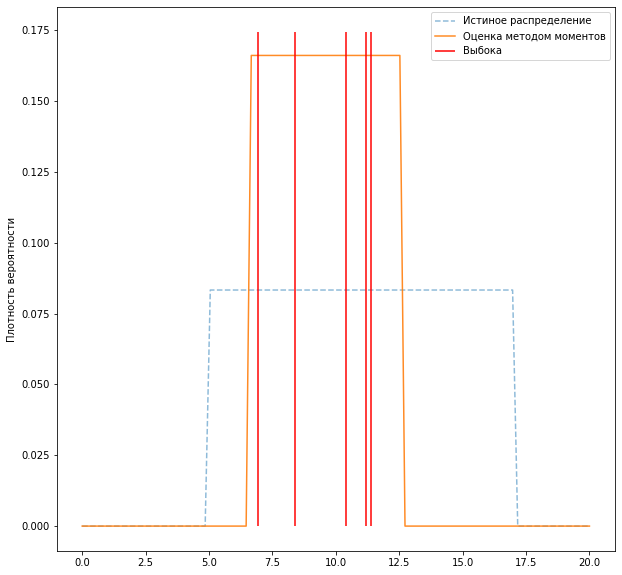

In [21]:
from scipy.stats import uniform
import matplotlib.pyplot as plt

# Зададим  истиное распределение
true_a = 5
true_b = 17
true_distr = uniform(true_a, true_b - true_a)

# Создадим выборку
size = 5
sample = true_distr.rvs(size = size)

# Посчитаем моменты
mu = sample.mean()
sigma = sample.std()

# Оценим параметры из найденых моментоы
b = (2*mu+sigma*12**0.5)/2
a = (2*mu-sigma*12**0.5)/2

# Зададим распределение на оцененых параметрах
distr = uniform(a, b - a)

# Сравним истиное и найденые распределения
f = plt.figure(figsize = (10, 10))
x = np.linspace(0, 20, 100)
plt.plot(x, true_distr.pdf(x), ls = "--", alpha = 0.5, label = "Истиное распределение")
plt.plot(x, distr.pdf(x), alpha = 0.9, label = "Оценка методом моментов")
ymin, ymax = plt.gca().get_ylim()
plt.vlines(sample, 0, ymax, color = "red", label = "Выбока")
plt.ylabel("Плотность вероятности")
plt.legend()

Метод моментов позволяет быстро (и дешево в вычислительном плане) оценить значения параметра выбраного распределения. Однако он может давать абсурдные результаты. Представим что в примере выше наша выборка имеет вид $\{0, 0, 0, 0, 1\}$. Получим оценку границ равномерного распределения для этой выборки:

In [22]:
import numpy as np
sample = np.array([0, 0, 0, 0, 1])
mu = sample.mean()
sigma = sample.std()
b = (2*mu+sigma*12**0.5)/2
a = (2*mu-sigma*12**0.5)/2
print(f"a = {a:.1}; b = {b:.1}")


a = -0.5; b = 0.9


Видно, что метод моментов дает заведомо нерелистичную оценку верхней границы - ее значение не может быть ниже максимального значения в выборке. 

## Оценка наибольшего правдоподобия

Проблема нереалистичности оценок может быть решена с помощью функции правдоподобия. В самом деле, в прошлой лекции мы ввели функцию описывающую правдоподобность различных значений параметра. Значение параметра максимизирующее эту функцию и будет наиболее правдоподобным. Такая оценка называется оценкой наибольшего правдоподобия (Maximum Likelihood Estimate, MLE). 

$$\theta_{\text{MLE}} =  \underset{\theta}{\operatorname{argmax}}\mathcal{L}(\theta)\equiv \underset{\theta}{\operatorname{argmin}}(-\log\mathcal{L}(\theta))$$

Если распределение случайной величины $y$ зависит не только от параметров распределения $\theta$ но и от входной переменной $x$ задача поиска оценки максимального правдоподобия записывается следующим образом:

$$\theta_{\text{MLE}} =  \underset{\theta}{\operatorname{argmin}}-\sum_{i=1}^{N_\mathcal{D}}\log p(y_i|x_i, \theta)$$

Тут $N_\mathcal{D}$ это объем выборки, и каждое значение выборки имеет вид $(x_i, y_i)$, где $x_i$ - это входная переменная, а $y_i$ - случайная величниа. Несложно видить что в такой формулировке задача поиска значений максимального правдоподобия приобретает вид треировки модели в задаче обучения с учителем: мы ищем модель наилучшим образом предсказывающую величину $y$ для входных данных $x$.

Если модель соответсвует обечению без учителя, то выражение для оценки MLE упрощается: 

$$\theta_{\text{MLE}} =  \underset{\theta}{\operatorname{argmin}}-\sum_{i=1}^{N_\mathcal{D}}\log p(y_i|\theta)$$

Как правило, такую задачу приходится решать при обработке данных из контролируемого эксперимента, где значения входных переменных зафиксированы. 

Благодаря своему способу построения эта оценка гарантирует значения параметров позволяющие наилучшим образом описать данные с помошью выбраной модели. В самом деле, допустим что у нас есть выборка $N$ значений случайной величины $\mathbf{y}$. Эмперическое распределние функции плотности вероятности для этой величины будет

$$p_{\mathcal{D}} = \frac{1}{N}\sum_{i=1}^{N}\delta(\mathbf{y} - \mathbf{y}_i)$$

Теперь, допустим мы считаем что величина $\mathbf{y}$ по какому-то параметрическому распределению $q(\mathbf{y})=p(\mathbf{y}|\theta)$. Найдем значения $\theta$ которые бы сделали распределение $q(\mathbf{y})$ максимально близким к $p_{\mathcal{D}}$.

Прежде всего, выберем как определять "близость" распределний. Стандартным выбором в этом случае является рассотяние Ку́льбака — Ле́йблера:

$$D_{KL}(p||q)=\sum_{\mathbf{y}}p(\mathbf{y})\log\frac{p(\mathbf{y})}{q(\mathbf{y})} = \underbrace{\sum_{\mathbf{y}}p(\mathbf{y})\log p(\mathbf{y})}_{-H(p)}
- \underbrace{\sum_{\mathbf{y}}p(\mathbf{y})\log q(\mathbf{y})}_{H_{cc}(p,q)}$$

Первое слагаемое $H(p)$ является энтропией исходного распределения и не зависит от параметров модели. Второй параметр яаляется кросс-энтропией распределени $q$ и $p$.

Учитывая что эмперическое распределение $p$ пердставляет собой набор дельта-функций, мы можем перейти от суммированию по всему множеству значений $\mathbf{y}$ к сумированию по значениям выборки при подсчете кросс-энтропии:

$$D_{KL}(p||q)=const -\frac{1}{N}\sum_{i = 1}^{N}\log p(\mathbf{y}_i|\theta) = const + NLL(\theta)$$

Таким образом, минимизация отрицательного логарифма функции правдоподобия (или максимизация правдоподобия) ведет к минимуму расстояния  Ку́льбака — Ле́йблера. А значит,  полученное распределение $q(\mathbf{y})$ наилучшим образом описывает данные с учетом выбраной модели.

### MLE для распределения Бернулли

В общем случае максимум функци правдоподобия ищется численно. Тем не менее, полезно рассмотреть значения этой оценки для случаев когда ее можно выполнить аналитически.

Рассмотрим эксперимент Бернулли и найдем оценку максимального правдоподобия для параметра распределения $\theta$:

$$\log\mathcal{L}(\theta) = \sum_{i=1}^{N}\log(p(y_i|\theta)) = \sum_{i=1}^{N}\log(\theta^{y_i}(1-\theta)^{1-y_i}) = \sum_{i}y_i \log\theta + \sum_{i}(1-y_i)\log{\theta}  $$ 

Учитывая, что $y_i$ принимает только значения $\{0, 1\}$, получим: 

$$\log\mathcal{L}(\theta) = N_1\log\theta +N_0\log(1-\theta)$$

Найдем производную функции:

$$\frac{d}{d\theta}\log\mathcal{L}(\theta) = \frac{N_1}{\theta}+\frac{N_0}{1-\theta}$$

Экстремум функции будет при нуле производной. Получим и решим урванение относительно $\theta_{MLE}$:

$$\frac{N_1}{\theta_{MLE}}+\frac{N_0}{1-\theta_{MLE}} = 0$$
$$\theta_{MLE}=\frac{N_1}{N_1+N_0}$$

Таким образом, оценка наибольшего правдоподобия для парметра распределения Бернулли будет просто средним по выборке - что соответствует нитуитивным ожиданиям.

### MLE для равномерного распределения

Вернемся к примерну равномерного распределения из иллюстрации метода моментов. Пусть $y\sim U(a,b)$ и у нас есть выборка из $N$ значений. Составим функцию правдоподобия. 

$$\mathcal{L}(a, b) = \prod_{i=1}^{N} p(y_i|a,b)$$

Заметим, что функция отлична от нуля только если все значения выборки внутри диапазона $[a,b]$. Пусть $a\leq y_{min}$ и $b\geq y_{max}$. Тогда:

$$-\log\mathcal{L}(a, b) = -\sum_{i=1}^{N} \frac{1}{b - a} = -\frac{N}{b-a}$$
Учитывая, что $b>y_{max}\geq y_{min}\geq a$, максимум функции правдподобия будет при  $a = y_{min}$ и $b = y_{max}$.


### MLE для нормального распределения

Пусть $y\sim\mathcal{N}(\mu,\sigma^2)$, и пусть у нас есть выборка $N$ значений этой случайной величины. Можно ожидать, что самой правдоподобоной оценкой параметра $\mu$ будет среднее по выборке $\frac{1}{N}\sum_iy_i$, а самой правдоподобной оценкой дисперсии -  средний квадрат отклонения $\frac{1}{N}\sum_i(y_i-\bar{y})^2$ (отметим, что именно такие значения дал бы метод моментов). Проверим совпадет ли оценка наибольшего правдоподобия с интуитивно ожидаемой на этот раз.

$$-\log\mathcal{L}(\mu,\sigma^2) = -\sum_i\log[\frac{1}{\sqrt{2\pi\sigma^2}}\exp(-\frac{(y_i-\mu)^2}{2\sigma^2}] = 
\frac{1}{2\sigma^2}\sum_i(y_i-\mu)^2 + \frac{N}{2}\log(2\pi\sigma^2)$$

В точке экстремума производные этой функции должны быть равны нулю. Для начала найдем $\mu_{MLE}$:

$$d(-\log\mathcal{L}(\mu,\sigma^2) )/d\mu |_{\mu = \mu_{MLE}} = 0$$

Второе слагаемое NLL не зависит от $\mu$, поэтому производная сведентся к дифференциированию только первого слагаемого.

$$d NLL/d\mu = \frac{1}{2\sigma^2}\sum_id((y_i-\mu)^2)/d\mu =  -\frac{1}{\sigma^2}(\sum_i y_i-N\mu)$$

$$-\frac{1}{\sigma^2}\sum_i y_i-N\mu_{MLE} = 0 \rightarrow \mu_{MLE} = \frac{1}{N}\sum_i y_i \equiv \bar{y}$$

Аналогичным образом приравняем к нулю производную по дисперсси:

$$d NLL/d\sigma^2 = -\frac{1}{2\sigma^4}\sum_i(y_i-\mu)^2- \frac{N}{2\sigma^2}$$
$$ -\frac{1}{2\sigma_{MLE}^4}\sum_i(y_i-\mu)^2+\frac{N}{2\sigma_{MLE}^2} = 0$$
$$ -\frac{1}{2\sigma_{MLE}^2}(\frac{1}{\sigma_{MLE}^2}\sum_i(y_i-\mu)^2- \frac{N}{2}) = 0$$
$$\sigma_{MLE}^2 = \frac{1}{N}\sum_i(y_i-\mu_{MLE})^2\equiv s^2$$

Получается что и в случае с нормальным распределением оценка максимального правдоподобия совпала с интуитивно ожидаемой. 

### MLE для линейной регресии

В лекции 3 мы ввели модель линейной регрессии для описания случайной величины параметры распределения которой зависят от входящей переменной: $y\sim\mathcal{N}(\boldsymbol{w_\mu}^T\boldsymbol{x}+b,
\sigma^2)$. Так, модель линейной регрессии можно использовать для предсказания значения $y$ для данного значения $\boldsymbol{x}$. Покажем как "натренировать" линейную регрессию на данных - как определить параметры модели линейной регресси с помощью метода наибольшего правдоподобия.

Значения случайной величины $y$ распределены нормально:

$$p(y|\boldsymbol{x}, \boldsymbol{\theta}) = \mathcal{N}(\boldsymbol{w_\mu}^T\boldsymbol{x}, \sigma^2)$$

В этой формуле $\boldsymbol{x}$ - расширеный вектор входных значений, а $\boldsymbol{w_\mu}$ и $\sigma^2$ - параметры модели. "Расширеный" вектор $\boldsymbol{x}$ определяется как $(x_0, x_1, ..., x_n, 1)$ где $x_i$ - значение входной переменной $i$. Использование расширенного вектора позволяет включить значение интерсепта $b$ в состав вектора параметров модели: $\boldsymbol{w_\mu} = (w_0, w_1, ... w_n, b)$. 

При наблюдении выборки $\mathcal{D}$ из $N$ измерений вида $(y_i, boldsymbol{x}_i)$ $NLL$ принимает вид:

$$NLL(\boldsymbol{w_\mu}, \sigma^2) = -\sum_i \log (\frac{1}{\sqrt{2\pi\sigma^2}}\exp[-\frac{1}{2\sigma^2}(y_i-\boldsymbol{w_\mu}^T\boldsymbol{x})^2])$$

Как и в случае с обычным распределением это выражение можно упростить  и представить его в виде двух слагаемых:

$$NLL(\boldsymbol{w_\mu}, \sigma^2) = \frac{1}{2\sigma^2}\sum_i(y_i -\boldsymbol{w_\mu}^T\boldsymbol{x})^2 +  \frac{N}{2}\log(2\pi\sigma^2)$$

Первое слагаемое в этом выражении пропорционально _остаточной сумме квадратов_ (Residual Sum of Squares, RSS):

$$RSS(\boldsymbol{w}) = \sum_i(y_i-\boldsymbol{w}^T\boldsymbol{x}_i)^2 \equiv \sum_i r_i^2$$

Величина $r$ в этой формуле называется остаточной ошибкой (residual error). Остаточная сумма кввадратов позволяет определить _средний квадрат ошибки_ (Mean Squared Error, MSE):

$$MSE(\boldsymbol{w}) = \frac{1}{N}RSS(\boldsymbol{w}) = \frac{1}{N} \sum_i(y_i-\boldsymbol{w}^T\boldsymbol{x}_i)^2 $$

Наконец, _корень среднего квадрата ошибки_ (root mean squared eror, RMSE) очевидным образом определяется через MSE:

$$RMSE(\boldsymbol{w}) = \sqrt{\frac{1}{N} \sum_i(y_i-\boldsymbol{w}^T\boldsymbol{x}_i)^2} $$

Видно, что поиск оценки наибольшего правдоподобия для параметров $\boldsymbol{w}$  сводится к минимизации среднего квадрата ошибки. Эта процедура назывется минимизацией _методом наименьних квадратов_ (Ordinary Least Squares, OLS). В курсе линейной алгебры можно показать, что у этой задачи существует точное аналитическое решение:

$$\boldsymbol{w}_{MLE} \equiv \underset{\boldsymbol{w}}{\operatorname{argmin}}RSS(\boldsymbol{w}) = (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{y}$$

Тут $\boldsymbol{y}$ - вектор значенй случайной величины размерности длины выборки, а $\boldsymbol{X}$ - матрица значений входных параметров размерности длины выборки $\times$ число входных параметров.

### MLE  для задач классификации

В примере с линейной регрессией мы показали что минимизация квадрата ошибки эквивалентна поиску наибольшего правдоподобия. Рассмотрим похожим образом тренировку моделей для задачи классификации. 

Обучающая выборка в задаче классификации имеет вид $(y_i, \boldsymbol{x}_i)$, где $\boldsymbol{x}_i$ - вектор входных параметров, а $y_i$ принимает уникальные значения для каждой доступной категории. Модель классификации должна предсказывать категорию по вектору входных параметров, и модель тем лучше справляется со своей задачей чем меньше ошибок в ее предсказаниях. Соотвественно, в задачах классификации, минимизация функции правдоподобия сводится к минимизации _эмпирического риска_ (empirical risk).

Частым выбором функции потерь в задаче классификации является "0-1 функция" (0-1 loss):

$$l_{01}(y_i,\boldsymbol{\theta}_i,\boldsymbol{x}_i) = \begin{cases}
   0 &\text{ если }y_i=f(\boldsymbol{\theta}_i,\boldsymbol{x}_i)\\
   1 &\text{ если }y_i\neq f(\boldsymbol{\theta}_i,\boldsymbol{x}_i)
 \end{cases}$$
 
где $f(\boldsymbol{\theta}_i,\boldsymbol{x}_i)$ является предиктором. Эмпирический риск выражается в таком случае как

$$\mathcal{L}(\theta) = \frac{1}{N}\sum_i l_{01}(y_i,\boldsymbol{\theta}_i,\boldsymbol{x}_i)$$

В случае всего двух категорий (бинарная проблема) эмирический риск можно записать немного проще. Пусть величина $y$ и ее предсказания $\eta = f(\boldsymbol{\theta},\boldsymbol{x})$ принмиают значения ${-1,1}$. Тогда величина $y\eta$ будет равна 1 если предсказание верно и $-1$ в противном случае. Получается, что функцию потерь можно переписать в виде:

$l_{01}(y_i,\boldsymbol{\theta}_i,\boldsymbol{x}_i)  = \mathbb{I}(y_i \neq \eta_i) \equiv \mathbb{I}(y_i\eta_i<0)$$

Эмпирический риск принимает вид:

$$\mathcal{L}(\boldsymbol{\theta}) = \frac{1}{N}\sum_i \mathbb{I}(y_i\eta_i<0)$$

Проиллюстрируем эмпирический риск для задачи бинарной классификации. Наша выборка будет состояить из пар $(y, x)$, где $y\in\{0,1\}$, а $x\in\mathbb{R}$. Модель будет иметь всего один параметр $x_0$, такой что:

$$y = \begin{cases}
   0 &\text{ если } x < x_0\\
   1 &\text{ если } x \geq x_0
 \end{cases}$$
 
 На рисунке ниже изображена выборка и распределение эмпирического риска в зависимотсти от значний $x_0$.

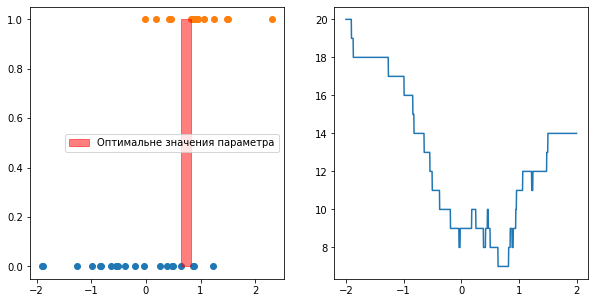

In [53]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
n_0 = 20
n_1 = 15
x_0 = norm(0, 1).rvs(n_0)
x_1 = norm(1, 0.5).rvs(n_1)

x = np.linspace(-2, 2, 1000)
er = []
for _x in x:
    er.append(len(x_0[x_0>=_x])+len(x_1[x_1<_x]))
er = np.array(er)


f, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].scatter(x_0, np.zeros(n_0))
ax[0].scatter(x_1, np.ones(n_1))
ax[0].fill_between(x, 0, 1, where = er == er.min(), color='red', alpha = 0.5, label = "Оптимальне значения параметра")
ax[0].legend()
ax[1].plot(x, er)

Видно, что числено минимизировать эмпирический риск в таком виде сложно - это ступенчатая функция с производной равной нулю везде где она определена. Для упрощения численного решения можно заменить $l_{01}(y\eta)$ суррогатной функцей потерь (surrogate loss function). Суррогатная функция потерь должна быть дифференциируемой (для численой минимизации) и результаты полученные в резлутате минимизации суррогатного риска были бы близки к результатам полученным при минимизации оригинального эмпирического риска.

Рассмотрим переход к суррогатной функции потерь на примере бинарной классификации. Пусть  $y\in\{-1, 1\}$ и модель предсказывает значения $\eta=f(\boldsymbol{\theta},\boldsymbol{x})$ такие что $\eta\in\mathbb{R}$. Соотвественно, предсказанное значение $\hat{y}$ определяется по правилу

$$\hat{y} = \begin{cases}
   -1 &\text{ если } \eta < 0\\
   1 &\text{ если } \eta \geq 0
 \end{cases}$$
 
Определим теперь вероятность принадлежности элемента выборки к классу $y$ для значений предсказания $\eta$:

$$p(y|\boldsymbol{\theta}_i,\boldsymbol{x}_i)=  \sigma(yf(\boldsymbol{\theta},\boldsymbol{x})) = \frac{1}{1+e^{-yf(\boldsymbol{\theta},\boldsymbol{x})}} \equiv \frac{1}{1+e^{-y\eta}}$$

Величина $y\eta$ называется _запасом_ (margin). Если запас положителен, то предсказание верно, а если отрицателен - то нет. Построим функцию правдоподобия:

$$NLL(\boldsymbol{\theta}) = \sum_i(1+e^{-y_i\eta_i}) = \sum_i(1+e^{-y_if(\boldsymbol{\theta},\boldsymbol{x}_i)}) $$

Для иллюстрации воспользуемся простейшей моделью с одним параметром $\eta = x - x_0$  b и сравним форму обратого логарифма функции правдоподобия с эмперическим риском

Text(0.5, 1.0, 'NLL логистической регресии')

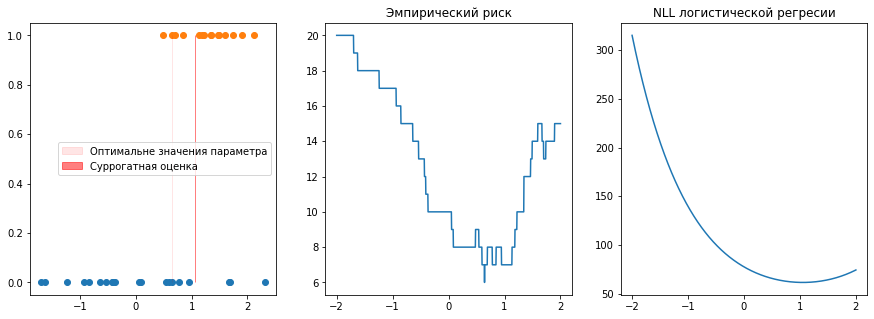

In [65]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
n_0 = 20
n_1 = 15
x_0 = norm(0, 1).rvs(n_0)
x_1 = norm(1, 0.5).rvs(n_1)

x = np.linspace(-2, 2, 1000)
er = []
nll = []
for _x in x:
    er.append(len(x_0[x_0>=_x])+len(x_1[x_1<_x]))
    _nll = 0
    for x0 in x_0:
        _nll += 1 + np.exp(x0-_x)
    for x1 in x_1:
        _nll += 1 + np.exp(-x1+_x)        
    nll.append(_nll)
er = np.array(er)
nll = np.array(nll)


f, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].scatter(x_0, np.zeros(n_0))
ax[0].scatter(x_1, np.ones(n_1))
ax[0].fill_between(x, 0, 1, where = er == er.min(), color='red', alpha = 0.1, label = "Оптимальне значения параметра")
ax[0].fill_between(x, 0, 1, where = nll == nll.min(), color='red', alpha = 0.5, label = "Суррогатная оценка")
ax[0].legend()
ax[1].plot(x, er)
ax[1].set_title("Эмпирический риск")
ax[2].plot(x, nll)
ax[2].set_title("NLL логистической регресии")

Мы видим, что максимизация функции правдоподобия сводится к минимизации суммы логарифмов потерь (log loss):

$$l_{ll}(y,\eta) = -\log p(y|\eta) = \log(1+e^{-y\eta})$$

Это - пример суррогатной функции потерь. Она появляется в ходе оценки MLE модели логистической регрессии в бинарной классификации. Видно, что она обладает хорошей дифференцируемостью и минимизация логарифма потерь приводит к результату схожему с минимизацией эмпирического риска. 

# Точечная оценка (point estimate)
## Method of moments

## MLE
## ERM
## Regularizaion and MAP
## Recursive estimation
## Min Chi 2
https://ned.ipac.caltech.edu/level5/Wall2/Wal3_4.html
# Оценка доверительных интервалов
## Теорема Уилкса
## Байесовский и классический доверительный интервал
# Примеры фитирования